# SVGA

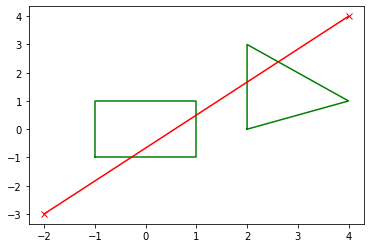

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from shapely.geometry import Point, LineString, MultiPoint, LinearRing
from shapely.geometry.polygon import Polygon

polys = np.array([
    Polygon([[2,0], [2,3], [4,1]]),
    Polygon([[-1,-1], [-1,1], [1,1], [1,-1]])
])

start = Point(-2,-3)
end = Point(4,4)

for poly in polys:
  plt.plot(*poly.exterior.xy, 'g')

path = LineString([start, end])
plt.plot(*path.xy, 'rx-')

plt.show()

# Pseudo Code

1. Find the nearest polygon that intersect with direct path.
  - find whether the path crosses each polygon
  - if it crosses polygons find distance between path
  - find the index of polygon with lowest distance

2. Find the two outermost points on the polygon, from the perspective of the line.
  - find the visibile points of the polygon from point
    - take start as a point and each vertex of the polygon as a line segment
    - check if intersection of polygon and the line segment is a point, if yes, it is a visible point
  - find points that have max dist from the intersecting line segment on both sides
    -

In [112]:
def nearest_poly(polys, path):
  """
  inputs: polys, path
  output: index of nearest poly intersecting with path, and two outermost points on nearest polygon
  """
  nearest_dist = float('inf')
  nearest_idx = 0
  start = Point(path.bounds[0], path.bounds[1])
  end = Point(path.bounds[-2], path.bounds[-1])
  for idx, poly in enumerate(polys):
    if path.crosses(poly) and start.distance(poly)<nearest_dist:
      nearest_dist = start.distance(poly)
      nearest_idx = idx
  
  #find visible points
  nearest_poly = polys[nearest_idx]
  visible_points = []
  for coord in list(nearest_poly.exterior.coords[:-1]):
    line = LineString([start, Point(coord[0],coord[1])])
    print('Start and end:',start.coords,[coord[0],coord[1]],'\n')
    if line.intersection(nearest_poly).geom_type == 'Point':
      visible_points.append(coord)
  
  #find points on each side of the line
  sides=[[],[]]
  for point in visible_points:
    if LinearRing([start.coords[0], end.coords[0], point]).is_ccw:
      sides[0].append(point)
    else:
      sides[1].append(point)
  
  #find extreme points on each side
  outermost_points=[]
  for side in sides:
    farthest_dist_side = 0
    farthest_idx_side = 0
    for idx, point in enumerate(side):
      if Point(point).distance(path)>farthest_dist_side:
        farthest_dist_side = Point(point).distance(path)
        farthest_idx_side = idx
    outermost_points.append(side[farthest_idx_side])

  #find extreme points on each side
  return nearest_idx, outermost_points

In [113]:
#test
path.intersection(polys[0]).geom_type

'LineString'

In [114]:
nearest_poly(polys,path)

Start and end: <shapely.coords.CoordinateSequence object at 0x7f47eee9eac8> [-1.0, -1.0] 

Start and end: <shapely.coords.CoordinateSequence object at 0x7f47eee9eeb8> [-1.0, 1.0] 

Start and end: <shapely.coords.CoordinateSequence object at 0x7f47eee9ec50> [1.0, 1.0] 

Start and end: <shapely.coords.CoordinateSequence object at 0x7f47ef057898> [1.0, -1.0] 



(1, [(-1.0, 1.0), (1.0, -1.0)])